In [51]:
import pandas as pd
import numpy as np

import geopandas as gpd
import geojson
import folium.folium

import seaborn as sns
import matplotlib.pyplot as plt

import folium
from folium import plugins

%matplotlib inline

pd.set_option('display.max_rows', 1000)

## Info from WMS Catastro

In [52]:
# Servicio WMS Castastro
#
# http://ovc.catastro.meh.es/cartografia/INSPIRE/spadgcwms.aspx
#
# EL WMS sólo devuelve imagen, la información la devuelve el WFS

In [3]:
from owslib.wms import WebMapService

url = 'http://ovc.catastro.meh.es/Cartografia/WMS/ServidorWMS.aspx?'

wms_catastro = WebMapService(url)

print(wms_catastro.contents.keys())
print(wms_catastro.identification.version)

odict_keys(['Catastro', 'CONSTRU', 'TXTCONSTRU', 'SUBPARCE', 'TXTSUBPARCE', 'PARCELA', 'TXTPARCELA', 'MASA', 'TXTMASA', 'EJES', 'LIMITES', 'TEXTOS', 'ELEMLIN'])
1.1.1


- Catastro : conjunto de todas las capas de información

- Parcela:    geometrica de las parcelas catastrales 
- TxtParcela: rotulación del código de las parcelas 

- Masa, TxtMas: Polígonos y Manzanas
- Subparce, TxtSubparce: subparcelas de cultivo

- Parcela, TxtParcela
- Masa, TxtMasa

- Ejes
- Limites
- Textos
- ElemLIn

**Los elementos devueltos por el WMS no están según el convenio INSPIRE, además, s

In [4]:
wms_catastro['Catastro'].crsOptions # opciones de proyección

['EPSG:32630',
 'EPSG:25829',
 'EPSG:25831',
 'EPSG:25830',
 'EPSG:4258',
 'EPSG:23029',
 'EPSG:3785',
 'EPSG:3857',
 'EPSG:4230',
 'EPSG:4326',
 'EPSG:32628',
 'EPSG:32627',
 'EPSG:23031',
 'EPSG:32629',
 'EPSG:32631',
 'EPSG:23030',
 'EPSG:0']

In [5]:
[op.name for op in wms_catastro.operations] 

['GetCapabilities', 'GetMap', 'GetFeatureInfo']

In [6]:
wms_catastro['CONSTRU'].queryable

0

In [7]:
wms_catastro['CONSTRU'].boundingBoxWGS84

(-18.409639, 26.275479, 5.225974, 44.85536)

In [8]:
wms_catastro.getOperationByName('GetFeatureInfo').methods

[{'type': 'Get',
  'url': 'http://ovc.catastro.meh.es/Cartografia/WMS/ServidorWMS.aspx'}]

In [10]:
import folium
from folium import plugins


m = folium.Map(
    location= [40.4168, -3.7038], 
    zoom_start=16,
    control_scale=True,
    tiles='CartoDB positron'
)


w0 = folium.raster_layers.WmsTileLayer(
    url = 'http://ovc.catastro.meh.es/Cartografia/WMS/ServidorWMS.aspx?',
    layers = ['MASA', 'TXTMASA'], # ver nombre de la capa .contents.key
    name = 'Masa',
    fmt = 'image/jpeg',
    transparent = True,
    version = '1.1.1', # wms.identification.version
    attr = 'DIRECCION GENERAL DEL CATASTRO'
        ).add_to(m)

w1 = folium.raster_layers.WmsTileLayer(
    url = 'http://ovc.catastro.meh.es/Cartografia/WMS/ServidorWMS.aspx?',
    layers = ['CONSTRU', 'TXTCONSTRU'], # ver nombre de la capa .contents.key
    name = 'Construccion',
    fmt = 'image/jpeg',
    transparent = True,
    version = '1.1.1', # wms.identification.version
    attr = 'DIRECCION GENERAL DEL CATASTRO'
        ).add_to(m)

w2= folium.raster_layers.WmsTileLayer(
    url = 'http://ovc.catastro.meh.es/Cartografia/WMS/ServidorWMS.aspx?',
    layers = ['SUBPARCE', 'TXTSUBPARCE'], # ver nombre de la capa .contents.key
    name = 'Subparcelas',
    fmt = 'image/jpeg',
    transparent = True,
    version = '1.1.1', # wms.identification.version
    attr = 'DIRECCION GENERAL DEL CATASTRO'
        ).add_to(m)

w3= folium.raster_layers.WmsTileLayer(
    url = 'http://ovc.catastro.meh.es/Cartografia/WMS/ServidorWMS.aspx?',
    layers = ['PARCELA', 'TXTPARCELA'], # ver nombre de la capa .contents.key
    name = 'Parcelas',
    fmt = 'image/jpeg',
    transparent = True,
    version = '1.1.1', # wms.identification.version
    attr = 'DIRECCION GENERAL DEL CATASTRO'
        ).add_to(m)

w4= folium.raster_layers.WmsTileLayer(
    url = 'http://ovc.catastro.meh.es/Cartografia/WMS/ServidorWMS.aspx?',
    layers = ['EJES', 'LIMITES', 'TEXTOS', 'ELEMLIN'], # ver nombre de la capa .contents.key
    name = 'Ejes y limites',
    fmt = 'image/jpeg',
    transparent = True,
    version = '1.1.1', # wms.identification.version
    attr = 'DIRECCION GENERAL DEL CATASTRO'
        ).add_to(m)

folium.LayerControl().add_to(m)

m

En BU:Building está la información sobre currentUse, OfficialArea (grossFloorArea), external Reference

In [11]:
from owslib.wfs import WebFeatureService

url_wfs_buildings = 'http://ovc.catastro.meh.es/INSPIRE/wfsBU.aspx?'

wfs_catastro = WebFeatureService(url = url_wfs_buildings, 
                                 version = '1.1.0')

In [12]:
[op.name for op in wfs_catastro.operations]

[]

In [13]:
list(wfs_catastro.contents)

[]

In [58]:
CATASTRO_PATH = '../data/raw/catastro' # arturo_modelo.json & model.geojson

bu_df = gpd.read_file(f"{CATASTRO_PATH}/A.ES.SDGC.BU.28900.building.geojson")

cadastral_df = gpd.read_file(f"{CATASTRO_PATH}/A.ES.SDGC.CP.28900.cadastralparcel.geojson")

In [20]:
bu_df.shape

(123634, 25)

In [56]:
bu_df.head()

,gml_id,beginLifespanVersion,conditionOfConstruction,beginning,end,endLifespanVersion,informationSystem,reference,localId,namespace,...,numberOfBuildingUnits,numberOfDwellings,numberOfFloorsAboveGround,documentLink,format,sourceStatus,officialAreaReference,value,value_uom,geometry
0,ES.SDGC.BU. VK4700H,2014-03-28T00:00:00,-,2000-01-01T00:00:00,2000-01-01T00:00:00,None,https://www1.sedecatastro.gob.es/CYCBienInmueb...,VK4700H,VK4700H,ES.SDGC.BU,...,0,0,None,http://ovc.catastro.meh.es/OVCServWeb/OVCWcfLi...,jpeg,NotOfficial,grossFloorArea,0,m2,"POLYGON ((440433.629 4470953.961, 440432.170 4..."
1,ES.SDGC.BU.00006Z8VK4800A,2017-05-11T00:00:00,-,2000-01-01T00:00:00,2000-01-01T00:00:00,None,https://www1.sedecatastro.gob.es/CYCBienInmueb...,00006Z8VK4800A,00006Z8VK4800A,ES.SDGC.BU,...,0,0,None,http://ovc.catastro.meh.es/OVCServWeb/OVCWcfLi...,jpeg,NotOfficial,grossFloorArea,0,m2,"POLYGON ((440020.830 4479859.707, 440020.064 4..."
2,ES.SDGC.BU.000200100VK48E,2004-05-19T00:00:00,functional,1968-01-01T00:00:00,1968-01-01T00:00:00,None,https://www1.sedecatastro.gob.es/CYCBienInmueb...,000200100VK48E,000200100VK48E,ES.SDGC.BU,...,1,0,None,http://ovc.catastro.meh.es/OVCServWeb/OVCWcfLi...,jpeg,NotOfficial,grossFloorArea,26,m2,"POLYGON ((441657.574 4487050.292, 441658.164 4..."
3,ES.SDGC.BU.000200500VK56E,2013-10-17T00:00:00,declined,1995-01-01T00:00:00,1995-01-01T00:00:00,None,https://www1.sedecatastro.gob.es/CYCBienInmueb...,000200500VK56E,000200500VK56E,ES.SDGC.BU,...,1,0,None,http://ovc.catastro.meh.es/OVCServWeb/OVCWcfLi...,jpeg,NotOfficial,grossFloorArea,646,m2,"MULTIPOLYGON (((451584.920 4467181.410, 451586..."
4,ES.SDGC.BU.000205600VK56E,2013-10-17T00:00:00,declined,1995-01-01T00:00:00,1995-01-01T00:00:00,None,https://www1.sedecatastro.gob.es/CYCBienInmueb...,000205600VK56E,000205600VK56E,ES.SDGC.BU,...,1,0,None,http://ovc.catastro.meh.es/OVCServWeb/OVCWcfLi...,jpeg,NotOfficial,grossFloorArea,202,m2,"POLYGON ((451579.400 4467169.610, 451582.370 4..."


In [25]:
for c in bu_df.columns:
    print(c)

gml_id
beginLifespanVersion
conditionOfConstruction
beginning
end
endLifespanVersion
informationSystem
reference
localId
namespace
horizontalGeometryEstimatedAccuracy
horizontalGeometryEstimatedAccuracy_uom
horizontalGeometryReference
referenceGeometry
currentUse
numberOfBuildingUnits
numberOfDwellings
numberOfFloorsAboveGround
documentLink
format
sourceStatus
officialAreaReference
value
value_uom
geometry


In [55]:
cols_interesantes = ['conditionOfConstruction', 'beginning', 'numberOfBuildingUnits',
                     'numberOfDwellings', 'value', 'currentUse', 'referenceGeometry','geometry']

# numberOfFloorsAboveGround is ALL NAN
# chequear que no es un error propio
#

buildng_df = bu_df[cols_interesantes]
buildng_df.head()

,conditionOfConstruction,beginning,numberOfBuildingUnits,numberOfDwellings,value,currentUse,referenceGeometry,geometry
0,-,2000-01-01T00:00:00,0,0,0,None,True,"POLYGON ((440433.629 4470953.961, 440432.170 4..."
1,-,2000-01-01T00:00:00,0,0,0,None,True,"POLYGON ((440020.830 4479859.707, 440020.064 4..."
2,functional,1968-01-01T00:00:00,1,0,26,2_agriculture,True,"POLYGON ((441657.574 4487050.292, 441658.164 4..."
3,declined,1995-01-01T00:00:00,1,0,646,3_industrial,True,"MULTIPOLYGON (((451584.920 4467181.410, 451586..."
4,declined,1995-01-01T00:00:00,1,0,202,3_industrial,True,"POLYGON ((451579.400 4467169.610, 451582.370 4..."


In [48]:
buildng_df.describe().T

,count,mean,std,min,25%,50%,75%,max
numberOfBuildingUnits,123634.0,17.654213,45.229215,0.0,1.0,6.0,18.0,1520.0
numberOfDwellings,123634.0,12.045012,23.962456,0.0,1.0,5.0,14.0,1473.0
value,123634.0,2249.408787,11531.612717,0.0,267.0,705.0,1822.0,2165674.0


In [49]:
buildng_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 123634 entries, 0 to 123633
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   conditionOfConstruction  123634 non-null  object  
 1   beginning                123634 non-null  object  
 2   numberOfBuildingUnits    123634 non-null  int64   
 3   numberOfDwellings        123634 non-null  int64   
 4   value                    123634 non-null  int64   
 5   geometry                 123634 non-null  geometry
dtypes: geometry(1), int64(3), object(2)
memory usage: 5.7+ MB


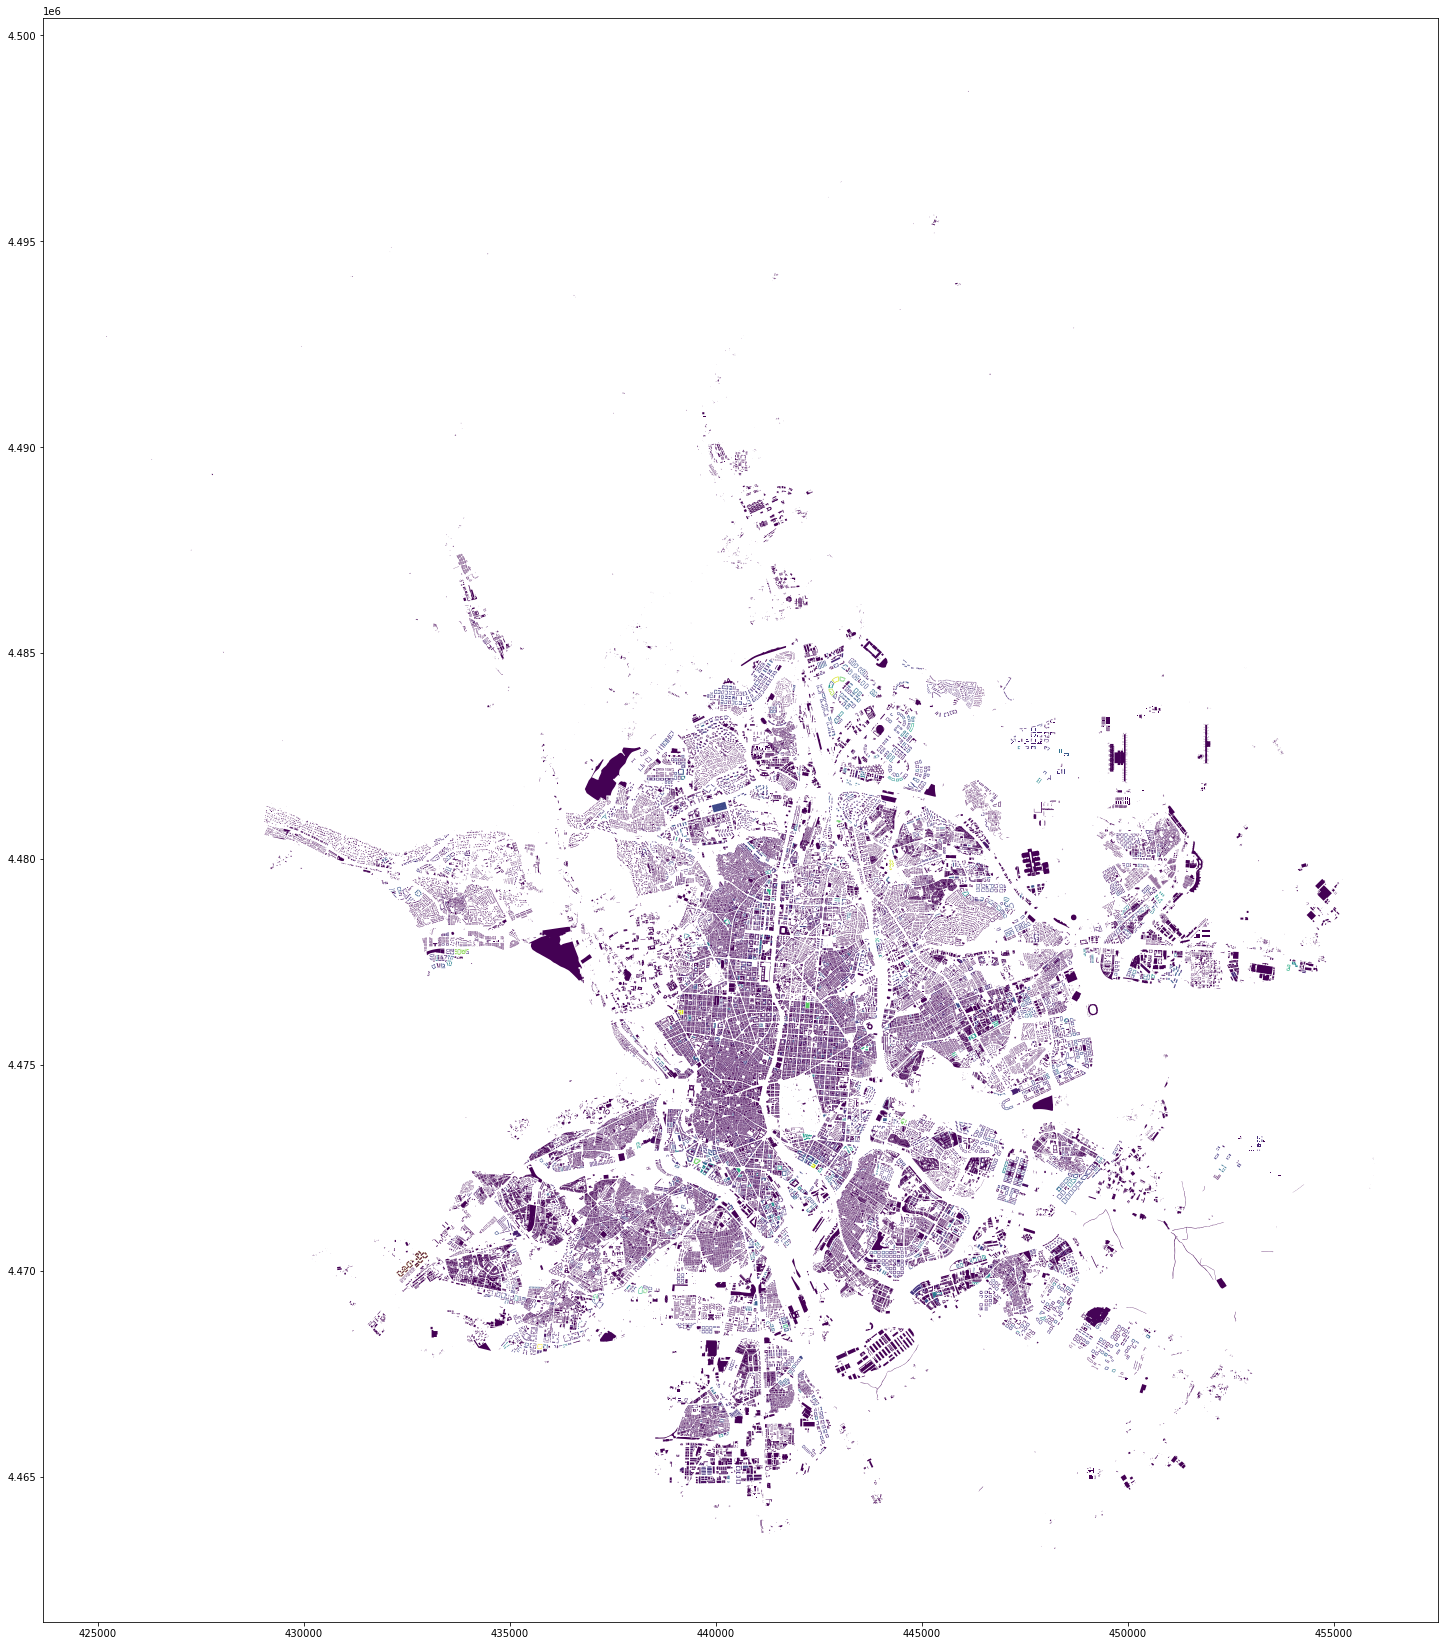

In [57]:
col_to_draw = 'numberOfBuildingUnits' # col value corresponds grossfloorarea
buildng_df[['geometry', col_to_draw]].plot(figsize = (25,35), column = col_to_draw)
plt.show()

In [60]:
cadastral_df.shape

(139931, 11)

In [61]:
cadastral_df.head()

,gml_id,areaValue,areaValue_uom,beginLifespanVersion,endLifespanVersion,localId,namespace,label,nationalCadastralReference,pos,geometry
0,ES.SDGC.CP.000200500VK56E,1268,m2,2013-10-17T00:00:00,None,000200500VK56E,ES.SDGC.CP,005,000200500VK56E,451607.03 4467199.27,"MULTIPOLYGON (((451599.360 4467174.940, 451584..."
1,ES.SDGC.CP.000205600VK56E,297,m2,2013-10-17T00:00:00,None,000205600VK56E,ES.SDGC.CP,056,000205600VK56E,451592.44 4467170.83,"MULTIPOLYGON (((451593.000 4467163.250, 451579..."
2,ES.SDGC.CP.000205700VK56E,155,m2,2013-10-17T00:00:00,None,000205700VK56E,ES.SDGC.CP,057,000205700VK56E,451587.93 4467161.77,"MULTIPOLYGON (((451590.040 4467156.910, 451576..."
3,ES.SDGC.CP.000205800VK56E,174,m2,2013-10-17T00:00:00,None,000205800VK56E,ES.SDGC.CP,058,000205800VK56E,451584.62 4467155.04,"MULTIPOLYGON (((451586.650 4467149.650, 451573..."
4,ES.SDGC.CP.000205900VK56E,172,m2,2013-10-17T00:00:00,None,000205900VK56E,ES.SDGC.CP,059,000205900VK56E,451581.09 4467147.85,"MULTIPOLYGON (((451583.260 4467142.410, 451569..."
